In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import time
from proj1_helpers import *
from Implementations import *
from Plot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot saving
If you want to recreate and overwrite the plots in the folder "figures/", set plot_save to True
<br>Warning: the old plots will be deleted (overwritten).

In [ ]:
plot_save = True

# Loading data into feature matrix, class labels, and event ids:

Load train data:

In [3]:
#DATA_TRAIN_PATH = '../../data/train.csv/train.csv' # TODO: download train data and supply path here
if os.path.isdir('Datasets'):
    DATA_TRAIN_PATH = 'Datasets/train.csv'
elif os.path.isdir('../Projet_1_data'):
    DATA_TRAIN_PATH = '../Projet_1_data/train.csv'
else:
    print("The Datasets folder cannot be found !")
print("Loading training data...")
t1 = time.time()
y_train, tX_train, ids_train = load_csv_data(DATA_TRAIN_PATH)
t2 = time.time()
print(f"Training data loaded ! ({round(t2-t1,2)} sec)")

Loading training data...
Training data loaded ! (8.43 sec)


Load test data (to do a common pre-processing with training data):

In [6]:
if os.path.isdir('Datasets'):
    DATA_TEST_PATH = 'Datasets/test.csv'
elif os.path.isdir('../Projet_1_data'):
    DATA_TEST_PATH = '../Projet_1_data/test.csv'
else:
    print("The Datasets folder cannot be found !")
print("Loading testing data...")
t1 = time.time()
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
t2 = time.time()
print(f"Testing data loaded ! ({round(t2-t1,2)} sec)")

Loading testing data...
Testing data loaded ! (20.71 sec)


# Data visualization
### Raw dataset
Raw dataset viszalization without preprocessing of the data:

Features visualization (raw dataset)


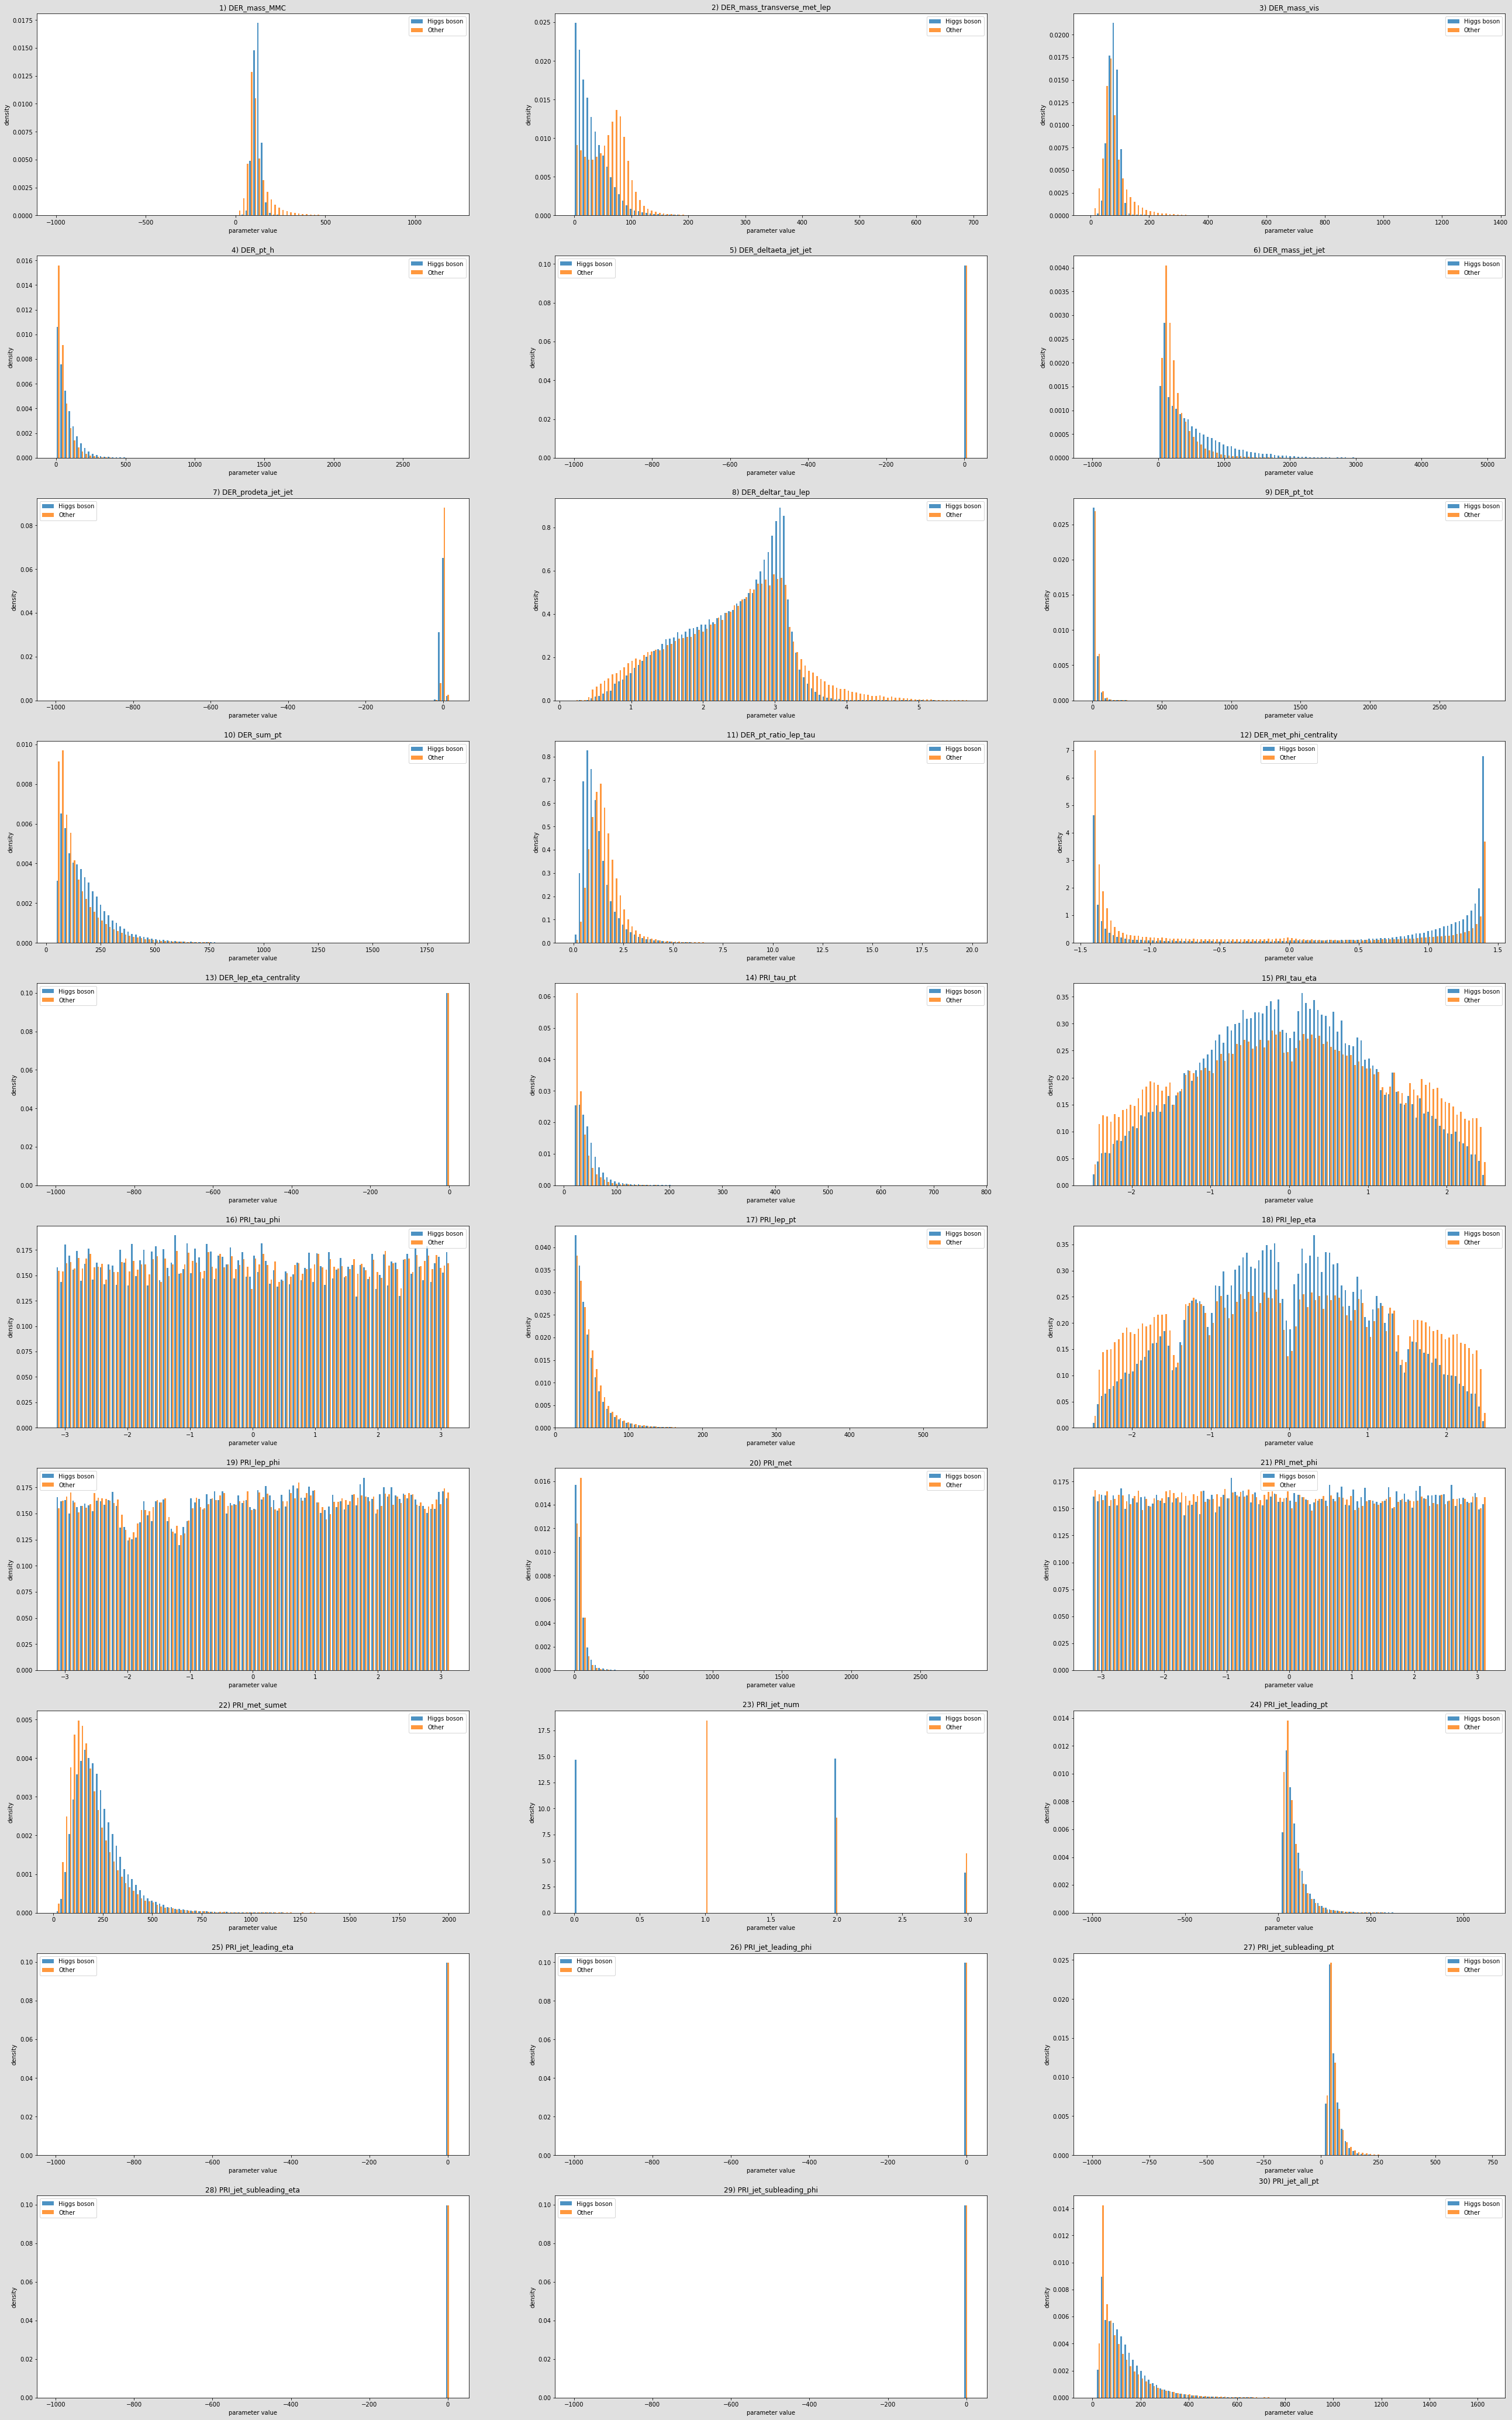

0

In [7]:
with open(DATA_TRAIN_PATH, mode='r') as f:
    param_names = np.array(f.readline().split(',')[2:])
print("Features visualization (raw dataset)")
plot_features_visualization(y_train, tX_train, names=param_names, save=plot_save)

### Preprocessed dataset
Preprocessed dataset visualization:

Features visualization (preprocessed dataset)


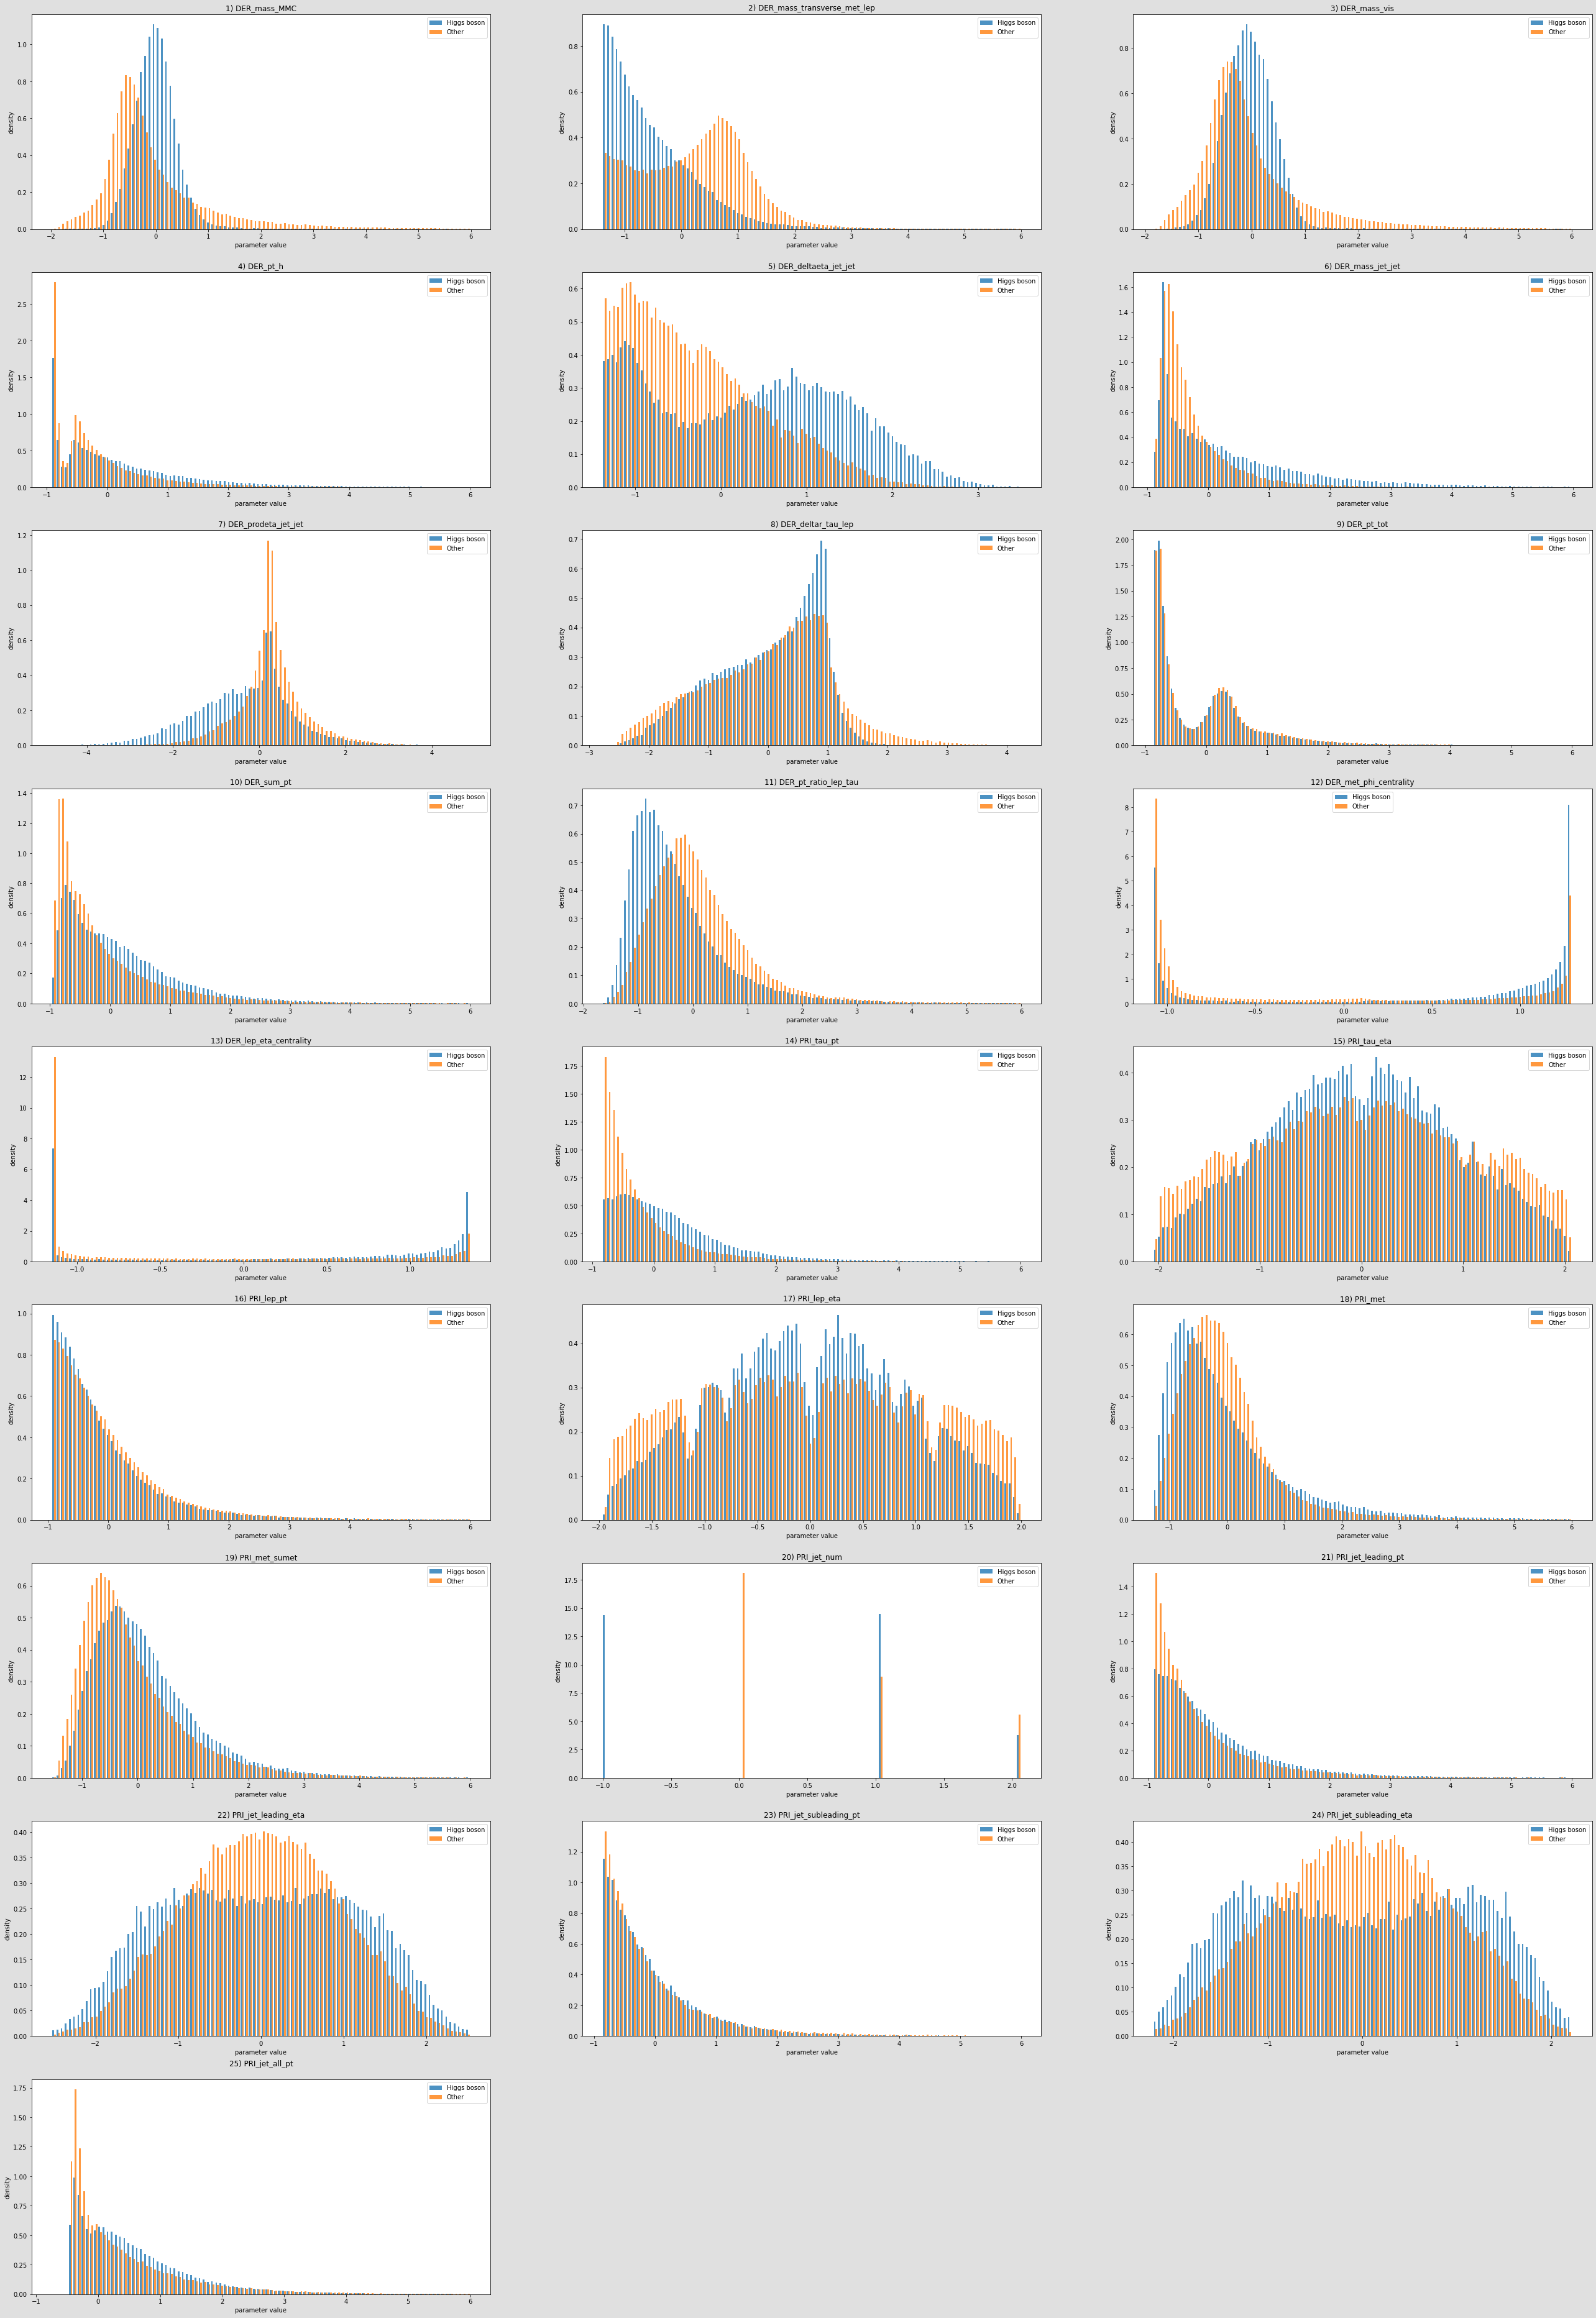

0

In [8]:
y_dv1, tX_dv1, _, _, _ = preprocess_data(y_train, tX_train, ids_train, tX_test, ids_test, param={'Degree_poly':1})
param_names_dv = np.delete(param_names, [15,18,20,25,28]) # parameters removed in preprocess
print("Features visualization (preprocessed dataset)")
plot_features_visualization(y_dv1, tX_dv1[:,1:], names=param_names_dv, save=plot_save)

# TRAINING MODELS

### Setting global variables:

Including preprocessing of the data (train and test preprocessed together):

In [11]:
y_tr, tX_tr, ids_tr, tX_te, ids_te = preprocess_data(y_train, tX_train, ids_train, tX_test, ids_test, param={})
seed = 1
k_fold = 5
k_indices = build_k_indices(y_tr, k_fold, seed)

# Least squares

Parameters definition for optimization:

In [88]:
model = 'least_squares'
degrees = np.arange(1,16,1)

Parameters optimization:

In [89]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params = None, seed = seed, feedback = True)

Optimizing degree 1/15, model: least_squares, arguments: None
Optimizing degree 2/15, model: least_squares, arguments: None
Optimizing degree 3/15, model: least_squares, arguments: None
Optimizing degree 4/15, model: least_squares, arguments: None
Optimizing degree 5/15, model: least_squares, arguments: None
Optimizing degree 6/15, model: least_squares, arguments: None
Optimizing degree 7/15, model: least_squares, arguments: None
Optimizing degree 8/15, model: least_squares, arguments: None
Optimizing degree 9/15, model: least_squares, arguments: None
Optimizing degree 10/15, model: least_squares, arguments: None
Optimizing degree 11/15, model: least_squares, arguments: None
Optimizing degree 12/15, model: least_squares, arguments: None
Optimizing degree 13/15, model: least_squares, arguments: None
Optimizing degree 14/15, model: least_squares, arguments: None
Optimizing degree 15/15, model: least_squares, arguments: None


Plot degree vs accuracy:

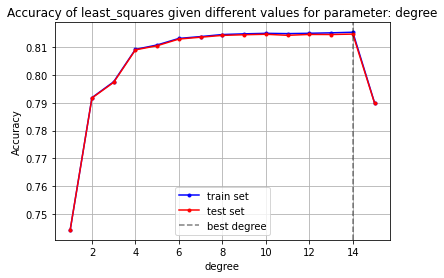

In [90]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = plot_save, img_name = 'least_squares_accuracy')

Plot on MSE gave aberrant values, which illustrated that this loss is not appropriate nor always informative for categorization. We use labels mean accuracy for model selection and performance assessment.

Manually choose best parameters (we consider that 10 is enough and only noise makes 14 better):

In [10]:
best_degree = 10

Compute performance on 5 splits with best parameters:

In [11]:
model = 'least_squares'
params = None

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

Starting cross-validation 1/5 for least_squares, extended feature of degree 10 and arguments : None
Starting cross-validation 2/5 for least_squares, extended feature of degree 10 and arguments : None
Starting cross-validation 3/5 for least_squares, extended feature of degree 10 and arguments : None
Starting cross-validation 4/5 for least_squares, extended feature of degree 10 and arguments : None
Starting cross-validation 5/5 for least_squares, extended feature of degree 10 and arguments : None


In [12]:
print('Mean accuracy of best least squares model: ', round(np.mean(accs_te),3))

Mean accuracy of best least squares model:  0.815


Store values for comparison with other models later:

In [13]:
np.save('best_models_perf/best_accs_' + model, accs_te)

# Least Squares GD 

Parameters definition for optimization. We use AdaGrad for learning rate:

In [17]:
model = 'least_squares_GD'
degrees = np.arange(1,7,1)
max_iters = 50
plot = False
params = {'max_iters' : max_iters, 'plot' : plot}

Parameters optimization:

In [18]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params = params, seed = seed, feedback = True)

Optimizing degree 1/6, model: least_squares_GD, arguments: {'max_iters': 50, 'plot': False}
Optimizing degree 2/6, model: least_squares_GD, arguments: {'max_iters': 50, 'plot': False}
Optimizing degree 3/6, model: least_squares_GD, arguments: {'max_iters': 50, 'plot': False}
Optimizing degree 4/6, model: least_squares_GD, arguments: {'max_iters': 50, 'plot': False}
Optimizing degree 5/6, model: least_squares_GD, arguments: {'max_iters': 50, 'plot': False}
Optimizing degree 6/6, model: least_squares_GD, arguments: {'max_iters': 50, 'plot': False}


Plot degree vs accuracy:

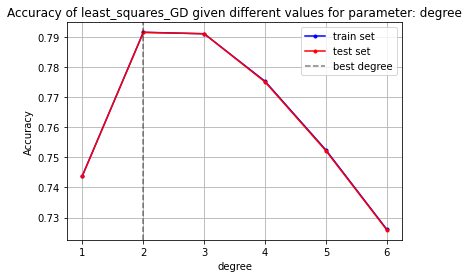

In [19]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = plot_save, img_name = 'least_squares_GD_accuracy')

Manually choose best parameters:

In [20]:
best_degree = 2

Compute performance on 5 splits with best parameters:

Starting cross-validation 1/5 for least_squares_GD, extended feature of degree 2 and arguments : {'max_iters': 50, 'plot': True}
Starting cross-validation 2/5 for least_squares_GD, extended feature of degree 2 and arguments : {'max_iters': 50, 'plot': True}
Starting cross-validation 3/5 for least_squares_GD, extended feature of degree 2 and arguments : {'max_iters': 50, 'plot': True}
Starting cross-validation 4/5 for least_squares_GD, extended feature of degree 2 and arguments : {'max_iters': 50, 'plot': True}
Starting cross-validation 5/5 for least_squares_GD, extended feature of degree 2 and arguments : {'max_iters': 50, 'plot': True}


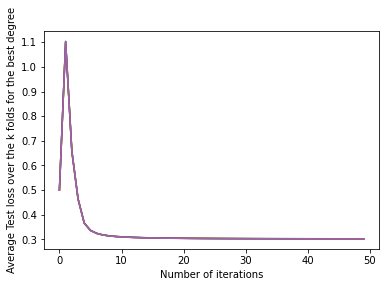

In [21]:
model = 'least_squares_GD'
max_iters = 50
params = {'max_iters':max_iters, 'plot':True}

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

In [22]:
print('Mean accuracy of best least squares gradient descent model: ', round(np.mean(accs_te),3))

Mean accuracy of best least squares gradient descent model:  0.792


Store values for comparison with other models later:

In [23]:
np.save('best_models_perf/best_accs_' + model, accs_te)

# Least squares SGD
### Batch size : 1

Parameters definition for optimization. We use AdaGrad for learning rate:

In [27]:
model = 'least_squares_SGD'
degrees = np.arange(1,7,1)
max_iters = 1000
batch_size = 1
plot = False
params = {'max_iters':max_iters, 'batch_size':batch_size, 'plot':plot}

In [28]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params=params, seed = seed, feedback = True)

Optimizing degree 1/6, model: least_squares_SGD, arguments: {'max_iters': 10, 'batch_size': 1, 'plot': False}
Optimizing degree 2/6, model: least_squares_SGD, arguments: {'max_iters': 10, 'batch_size': 1, 'plot': False}
Optimizing degree 3/6, model: least_squares_SGD, arguments: {'max_iters': 10, 'batch_size': 1, 'plot': False}
Optimizing degree 4/6, model: least_squares_SGD, arguments: {'max_iters': 10, 'batch_size': 1, 'plot': False}
Optimizing degree 5/6, model: least_squares_SGD, arguments: {'max_iters': 10, 'batch_size': 1, 'plot': False}
Optimizing degree 6/6, model: least_squares_SGD, arguments: {'max_iters': 10, 'batch_size': 1, 'plot': False}


Plot degree vs accuracy:

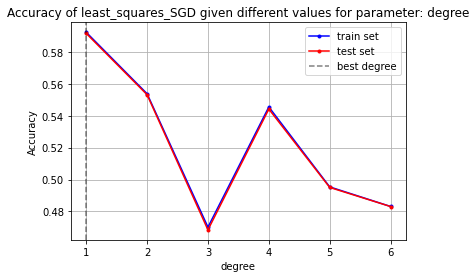

In [29]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = plot_save, img_name = 'least_squares_SGD_batch_size_1_accuracy')

We see that the accuracy does not make any sense. It is because the batch size (= 1) is so low that the gradient and weights quickly reach enormous values upon meeting particular datapoints. This ends up creating aberrant labels, which drives down the accuracy at aberrant levels.

We chose the same best degree as simple gradient descent.

Manually choose best parameters:

In [27]:
best_degree = 2

Compute performance on 5 splits with best parameters:

Starting cross-validation 1/5 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 1000, 'batch_size': 1, 'plot': True}
Starting cross-validation 2/5 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 1000, 'batch_size': 1, 'plot': True}


C:\Users\loris\EPFL\ML master\ml-project-1-jaggifanclub\Secondary.py:81: RuntimeWarning: divide by zero encountered in true_divide
  gamma=gamma_zero*(1/np.sqrt(h))
C:\Users\loris\EPFL\ML master\ml-project-1-jaggifanclub\Implementations.py:47: RuntimeWarning: invalid value encountered in multiply
  w = w - gamma * stoch_gradient


Starting cross-validation 3/5 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 1000, 'batch_size': 1, 'plot': True}
Starting cross-validation 4/5 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 1000, 'batch_size': 1, 'plot': True}
Starting cross-validation 5/5 for least_squares_SGD, extended feature of degree 2 and arguments : {'max_iters': 1000, 'batch_size': 1, 'plot': True}


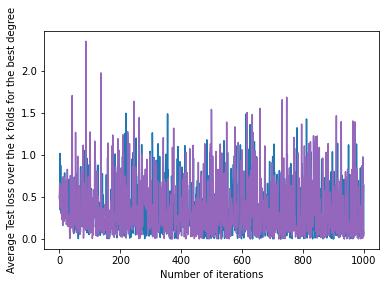

In [28]:
model = 'least_squares_SGD'
max_iters = 1000
batch_size = 1
params = {'max_iters':max_iters, 'batch_size':batch_size, 'plot':True}

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

In [29]:
print('Mean accuracy of best least squares stochastic gradient descent model (batch size = 1): ', round(np.mean(accs_te),3))

Mean accuracy of best least squares stochastic gradient descent model (batch size = 1):  0.304


We can see that a batch size of 1 is very problematic for weights convergence, and does not give results that can be compared to other functional methods. We stored them but did not use them later on.

Store values:

In [30]:
np.save(f"best_models_perf/best_accs_{model}_{batch_size}", accs_te)

### Higher batch size value : 256
Parameters definition for optimization. Here we change the batch size to a higher value which solves the problem met before.

In [31]:
model = 'least_squares_SGD'
degrees = np.arange(1,7,1)
max_iters=1000
batch_size=256
plot=False
params={'max_iters':max_iters, 'batch_size':batch_size, 'plot':plot}

Parameters optimization:

In [32]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params=params, seed = seed, feedback = True)

Optimizing degree 1/6, model: least_squares_SGD, arguments: {'max_iters': 1000, 'batch_size': 256, 'plot': False}
Optimizing degree 2/6, model: least_squares_SGD, arguments: {'max_iters': 1000, 'batch_size': 256, 'plot': False}
Optimizing degree 3/6, model: least_squares_SGD, arguments: {'max_iters': 1000, 'batch_size': 256, 'plot': False}
Optimizing degree 4/6, model: least_squares_SGD, arguments: {'max_iters': 1000, 'batch_size': 256, 'plot': False}
Optimizing degree 5/6, model: least_squares_SGD, arguments: {'max_iters': 1000, 'batch_size': 256, 'plot': False}
Optimizing degree 6/6, model: least_squares_SGD, arguments: {'max_iters': 1000, 'batch_size': 256, 'plot': False}


Plot degree vs accuracy:

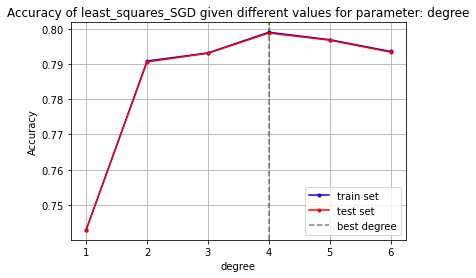

In [33]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = plot_save, img_name = 'least_squares_SGD_batch_size_250_accuracy')

Manually choose best parameters:

In [62]:
best_degree = 4

Compute performance on k splits with best parameters:

Starting cross-validation 1/5 for least_squares_SGD, extended feature of degree 4 and arguments : {'max_iters': 1000, 'batch_size': 256, 'plot': True}
Starting cross-validation 2/5 for least_squares_SGD, extended feature of degree 4 and arguments : {'max_iters': 1000, 'batch_size': 256, 'plot': True}
Starting cross-validation 3/5 for least_squares_SGD, extended feature of degree 4 and arguments : {'max_iters': 1000, 'batch_size': 256, 'plot': True}
Starting cross-validation 4/5 for least_squares_SGD, extended feature of degree 4 and arguments : {'max_iters': 1000, 'batch_size': 256, 'plot': True}
Starting cross-validation 5/5 for least_squares_SGD, extended feature of degree 4 and arguments : {'max_iters': 1000, 'batch_size': 256, 'plot': True}


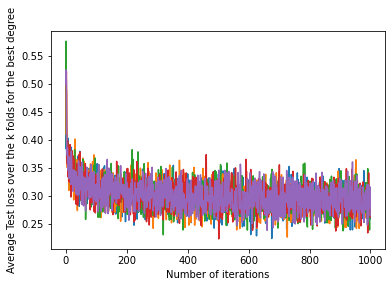

In [63]:
model = 'least_squares_SGD'
max_iters=1000
params = {'max_iters':max_iters, 'batch_size':batch_size, 'plot':True}

accs_te = []
for k in range(k_fold):
    _, loss_te, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

In [64]:
print('Mean accuracy of best least squares stochastic gradient descent model (batch size = 250): ', round(np.mean(accs_te),3))

Mean accuracy of best least squares stochastic gradient descent model (batch size = 250):  0.799


With this batch size, we have coherent results.

Store values for comparison with other models later:

In [65]:
np.save(f"best_models_perf/best_accs_{model}_{batch_size}", accs_te)

# Ridge regression

Parameters definition for optimization

In [38]:
model = 'ridge_regression'
degrees = np.arange(1,15,1)
lambdas = np.logspace(-6,0,7)

Parameters optimization:

In [39]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, lambdas, params = None, seed = seed, feedback = True)

Optimizing degree 1/14, model: ridge_regression, arguments: {'lambda': 1e-06}
Optimizing degree 1/14, model: ridge_regression, arguments: {'lambda': 1e-05}
Optimizing degree 1/14, model: ridge_regression, arguments: {'lambda': 0.0001}
Optimizing degree 1/14, model: ridge_regression, arguments: {'lambda': 0.001}
Optimizing degree 1/14, model: ridge_regression, arguments: {'lambda': 0.01}
Optimizing degree 1/14, model: ridge_regression, arguments: {'lambda': 0.1}
Optimizing degree 1/14, model: ridge_regression, arguments: {'lambda': 1.0}
Optimizing degree 2/14, model: ridge_regression, arguments: {'lambda': 1e-06}
Optimizing degree 2/14, model: ridge_regression, arguments: {'lambda': 1e-05}
Optimizing degree 2/14, model: ridge_regression, arguments: {'lambda': 0.0001}
Optimizing degree 2/14, model: ridge_regression, arguments: {'lambda': 0.001}
Optimizing degree 2/14, model: ridge_regression, arguments: {'lambda': 0.01}
Optimizing degree 2/14, model: ridge_regression, arguments: {'lambda

Here we optimized over 2 parameters, so we use heatmap to visualize best combination

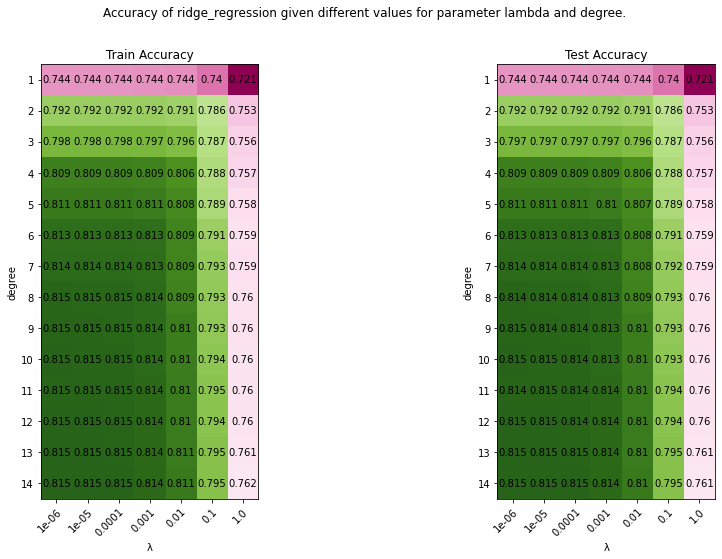

In [40]:
plot_heatmap(accs_tr, accs_te, degrees, lambdas, model, measure_type = 'Accuracy', save_img = plot_save, img_name = 'Heatmap_accuracy_ridge_regression')

Manually choose best parameters:

In [41]:
best_lambda = 1e-6
best_degree = 10

Compute performance on 5 splits with best parameters:

In [42]:
model = 'ridge_regression'
params = {'lambda' : best_lambda}

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)

Starting cross-validation 1/5 for ridge_regression, extended feature of degree 10 and arguments : {'lambda': 1e-06}
Starting cross-validation 2/5 for ridge_regression, extended feature of degree 10 and arguments : {'lambda': 1e-06}
Starting cross-validation 3/5 for ridge_regression, extended feature of degree 10 and arguments : {'lambda': 1e-06}
Starting cross-validation 4/5 for ridge_regression, extended feature of degree 10 and arguments : {'lambda': 1e-06}
Starting cross-validation 5/5 for ridge_regression, extended feature of degree 10 and arguments : {'lambda': 1e-06}


In [43]:
print('Mean accuracy of best ridge regression model: ', round(np.mean(accs_te),3))

Mean accuracy of best ridge regression model:  0.815


Store values for comparison with other models later:

In [44]:
np.save('best_models_perf/best_accs_' + model, accs_te)

# Logistic regression

Parameters definition for optimization. We use AdaGrad for learning rate adaptation and Euler's method for weights update to reach better results.

In [45]:
model = 'logistic_regression'
degrees = np.arange(1,10,1)
max_iters = 1000
gamma = 0.1
batch_size = 256
AdaGrad = True
Newton_method = False
params = {'max_iters' : max_iters, 'gamma' : gamma}
params_logistic = {'Batch_size' : batch_size, 'AdaGrad' : AdaGrad, 'Newton_method' : Newton_method}

Parameters optimization:

In [46]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, params = params, params_logistic = params_logistic, seed = seed, feedback = True)

Optimizing degree 1/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}
Optimizing degree 2/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}
Optimizing degree 3/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}
Optimizing degree 4/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}
Optimizing degree 5/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}
Optimizing degree 6/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}
Optimizing degree 7/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}


C:\Users\loris\EPFL\ML master\ml-project-1-jaggifanclub\Secondary.py:42: RuntimeWarning: overflow encountered in exp
  log_part[t<1000] = np.log(1 + np.exp(t))[t<1000] # log(1+e^t)
C:\Users\loris\EPFL\ML master\ml-project-1-jaggifanclub\Secondary.py:23: RuntimeWarning: overflow encountered in exp
  sig[np.logical_and(t<1000, t>-1000)] = (1.0 / (1.0 + np.exp(-t)))[np.logical_and(t<1000, t>-1000)] # 1/(1+e^(-t))


Optimizing degree 8/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}
Optimizing degree 9/9, model: logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1}


Plot degree vs accuracy:

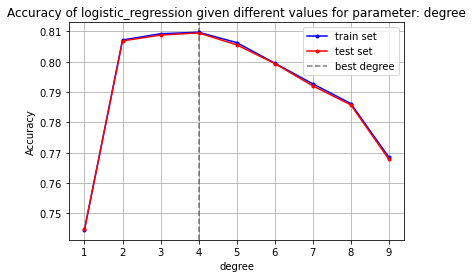

In [47]:
plot_param_vs_err(degrees, accs_tr, accs_te, model, 'Accuracy', save_img = plot_save, img_name = 'logistic_regression_accuracy')

Manually choose best parameters:

In [66]:
best_degree = 4

Compute performance on 5 splits with best parameters:

In [67]:
model = 'logistic_regression'
max_iters = 1000
gamma = 0.1
batch_size = 256
AdaGrad = True
Newton_method = False
params = {'max_iters' : max_iters, 'gamma' : gamma}
params_logistic = {'Batch_size' : batch_size, 'AdaGrad' : AdaGrad, 'Newton_method' : Newton_method}

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, params_logistic = params_logistic, feedback = True)
    accs_te.append(acc_te)

Starting cross-validation 1/5 for logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1}
Starting cross-validation 2/5 for logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1}
Starting cross-validation 3/5 for logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1}
Starting cross-validation 4/5 for logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1}
Starting cross-validation 5/5 for logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1}


In [68]:
print('Mean accuracy of best logistic regression model: ', round(np.mean(accs_te),3))

Mean accuracy of best logistic regression model:  0.809


Store values for comparison with other models later:

In [69]:
np.save(f'best_models_perf/best_accs_{model}_{batch_size}', accs_te)

# Regularized Logistic regression

Preprocessing and parameters definition for optimization. Again, we use AdaGrad instead of Newton.

In [70]:
model = 'reg_logistic_regression'
degrees = np.arange(1,10,1)
lambdas = np.logspace(-6,0,7)
max_iters = 1000
gamma = 0.1
batch_size = 256
AdaGrad = True
Newton_method = False
params = {'max_iters' : max_iters, 'gamma' : gamma}
params_logistic = {'Batch_size' : batch_size, 'AdaGrad' : AdaGrad, 'Newton_method' : Newton_method}

Parameters optimization:

In [71]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y_tr, tX_tr, k_fold, model, degrees, lambdas, params = params, params_logistic = params_logistic, seed = seed, feedback = True)

Optimizing degree 1/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1e-06}
Optimizing degree 1/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1e-05}
Optimizing degree 1/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}
Optimizing degree 1/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.001}
Optimizing degree 1/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.01}
Optimizing degree 1/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.1}
Optimizing degree 1/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1.0}
Optimizing degree 2/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1e-06}
Optimizing degree 2/9, model: reg_logistic_regression, arguments: {'

C:\Users\loris\EPFL\ML master\ml-project-1-jaggifanclub\Secondary.py:42: RuntimeWarning: overflow encountered in exp
  log_part[t<1000] = np.log(1 + np.exp(t))[t<1000] # log(1+e^t)


Optimizing degree 7/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1e-05}


C:\Users\loris\EPFL\ML master\ml-project-1-jaggifanclub\Secondary.py:23: RuntimeWarning: overflow encountered in exp
  sig[np.logical_and(t<1000, t>-1000)] = (1.0 / (1.0 + np.exp(-t)))[np.logical_and(t<1000, t>-1000)] # 1/(1+e^(-t))


Optimizing degree 7/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}
Optimizing degree 7/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.001}
Optimizing degree 7/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.01}
Optimizing degree 7/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.1}
Optimizing degree 7/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1.0}
Optimizing degree 8/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1e-06}
Optimizing degree 8/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 1e-05}
Optimizing degree 8/9, model: reg_logistic_regression, arguments: {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}
Optimizing degree 8/9, model: reg_logistic_regression, arguments: {

Here we optimized over 2 parameters, so we use heatmap to visualize best combination:

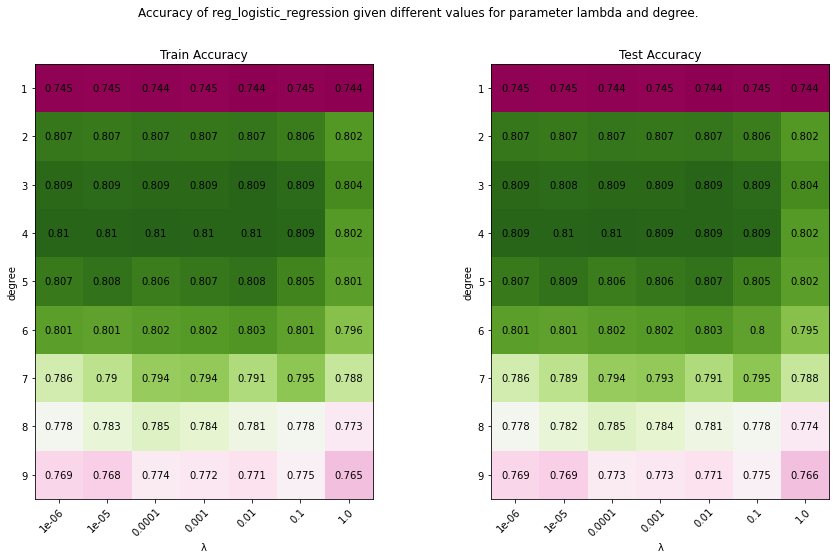

In [72]:
plot_heatmap(accs_tr, accs_te, degrees, lambdas, model, measure_type = 'Accuracy', save_img = plot_save, img_name = 'Heatmap_accuracy_reg_log_regression')

Manually choose best parameters:

In [73]:
best_degree = 4
best_lambda = 1e-4

Compute performance on k splits with best parameters:

In [80]:
model = 'reg_logistic_regression'
max_iters = 1000
gamma = 0.1
batch_size = 256
AdaGrad = True
Newton_method = False
params = {'max_iters' : max_iters, 'gamma' : gamma, 'lambda' : best_lambda}
params_logistic = {'Batch_size' : batch_size, 'AdaGrad' : AdaGrad, 'Newton_method' : Newton_method}

accs_te = []
for k in range(k_fold):
    _, _, _, acc_te = cross_validation(y_tr, tX_tr, k_indices, k, model, best_degree, params, params_logistic = params_logistic, feedback = True)
    accs_te.append(acc_te)

Starting cross-validation 1/5 for reg_logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}
Starting cross-validation 2/5 for reg_logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}
Starting cross-validation 3/5 for reg_logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}
Starting cross-validation 4/5 for reg_logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}
Starting cross-validation 5/5 for reg_logistic_regression, extended feature of degree 4 and arguments : {'max_iters': 1000, 'gamma': 0.1, 'lambda': 0.0001}


In [81]:
print('Mean accuracy of best regularized logistic regression model: ', round(np.mean(accs_te),3))

Mean accuracy of best regularized logistic regression model:  0.81


Store values for comparison with other models later:

In [82]:
np.save(f'best_models_perf/best_accs_{model}_{batch_size}', accs_te)

# Boxplots and variance of best models

We reload results previously stored for each optimized model and plot them using boxplots:

In [2]:
in_ = 'best_models_perf/best_accs_'
accs_ls_GD = np.load(f'{in_}least_squares_GD.npy')
#accs_ls_SGD_1 = np.load(f'{in_}least_squares_SGD_1.npy')
accs_ls_SGD_256 = np.load(f'{in_}least_squares_SGD_256.npy')
accs_ls = np.load(f'{in_}least_squares.npy')
accs_ridge = np.load(f'{in_}ridge_regression.npy')
accs_log = np.load(f'{in_}logistic_regression_256.npy')
accs_reg_log = np.load(f'{in_}reg_logistic_regression_256.npy')

In [3]:
accuracies = np.array([accs_ls_GD, accs_ls_SGD_256, accs_ls, accs_ridge, accs_log, accs_reg_log])
stds = np.std(accuracies, axis = 1)
means = np.mean(accuracies, axis = 1)
model_names = np.array(['Least sq. GD', 'Least sq. SGD_256', 'Least sq.','Ridge','Log reg_256','Reg log reg_256'])

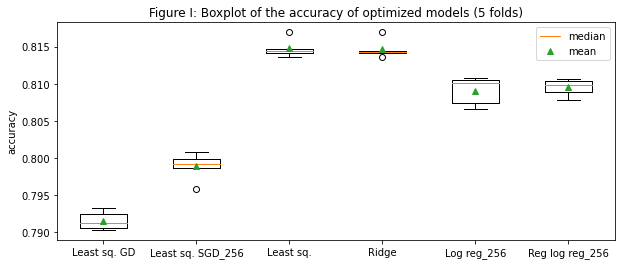

Least sq. GD: mean = 0.7916, std = 0.0011
Least sq. SGD_256: mean = 0.7989, std = 0.0017
Least sq.: mean = 0.8148, std = 0.0011
Ridge: mean = 0.8147, std = 0.0012
Log reg_256: mean = 0.8091, std = 0.0017
Reg log reg_256: mean = 0.8095, std = 0.001


In [9]:
plot_boxplots(accuracies, model_names, err_type = 'accuracy', save_img = plot_save, img_name = 'Boxplots of best models')
for i, model in enumerate(model_names):
    print(f'{model}: mean = {round(means[i],4)}, std = {round(stds[i],4)}')

# Data visualization with predictions: <br>true/false positive/negative

Features visualization (preprocessed dataset with predictions)


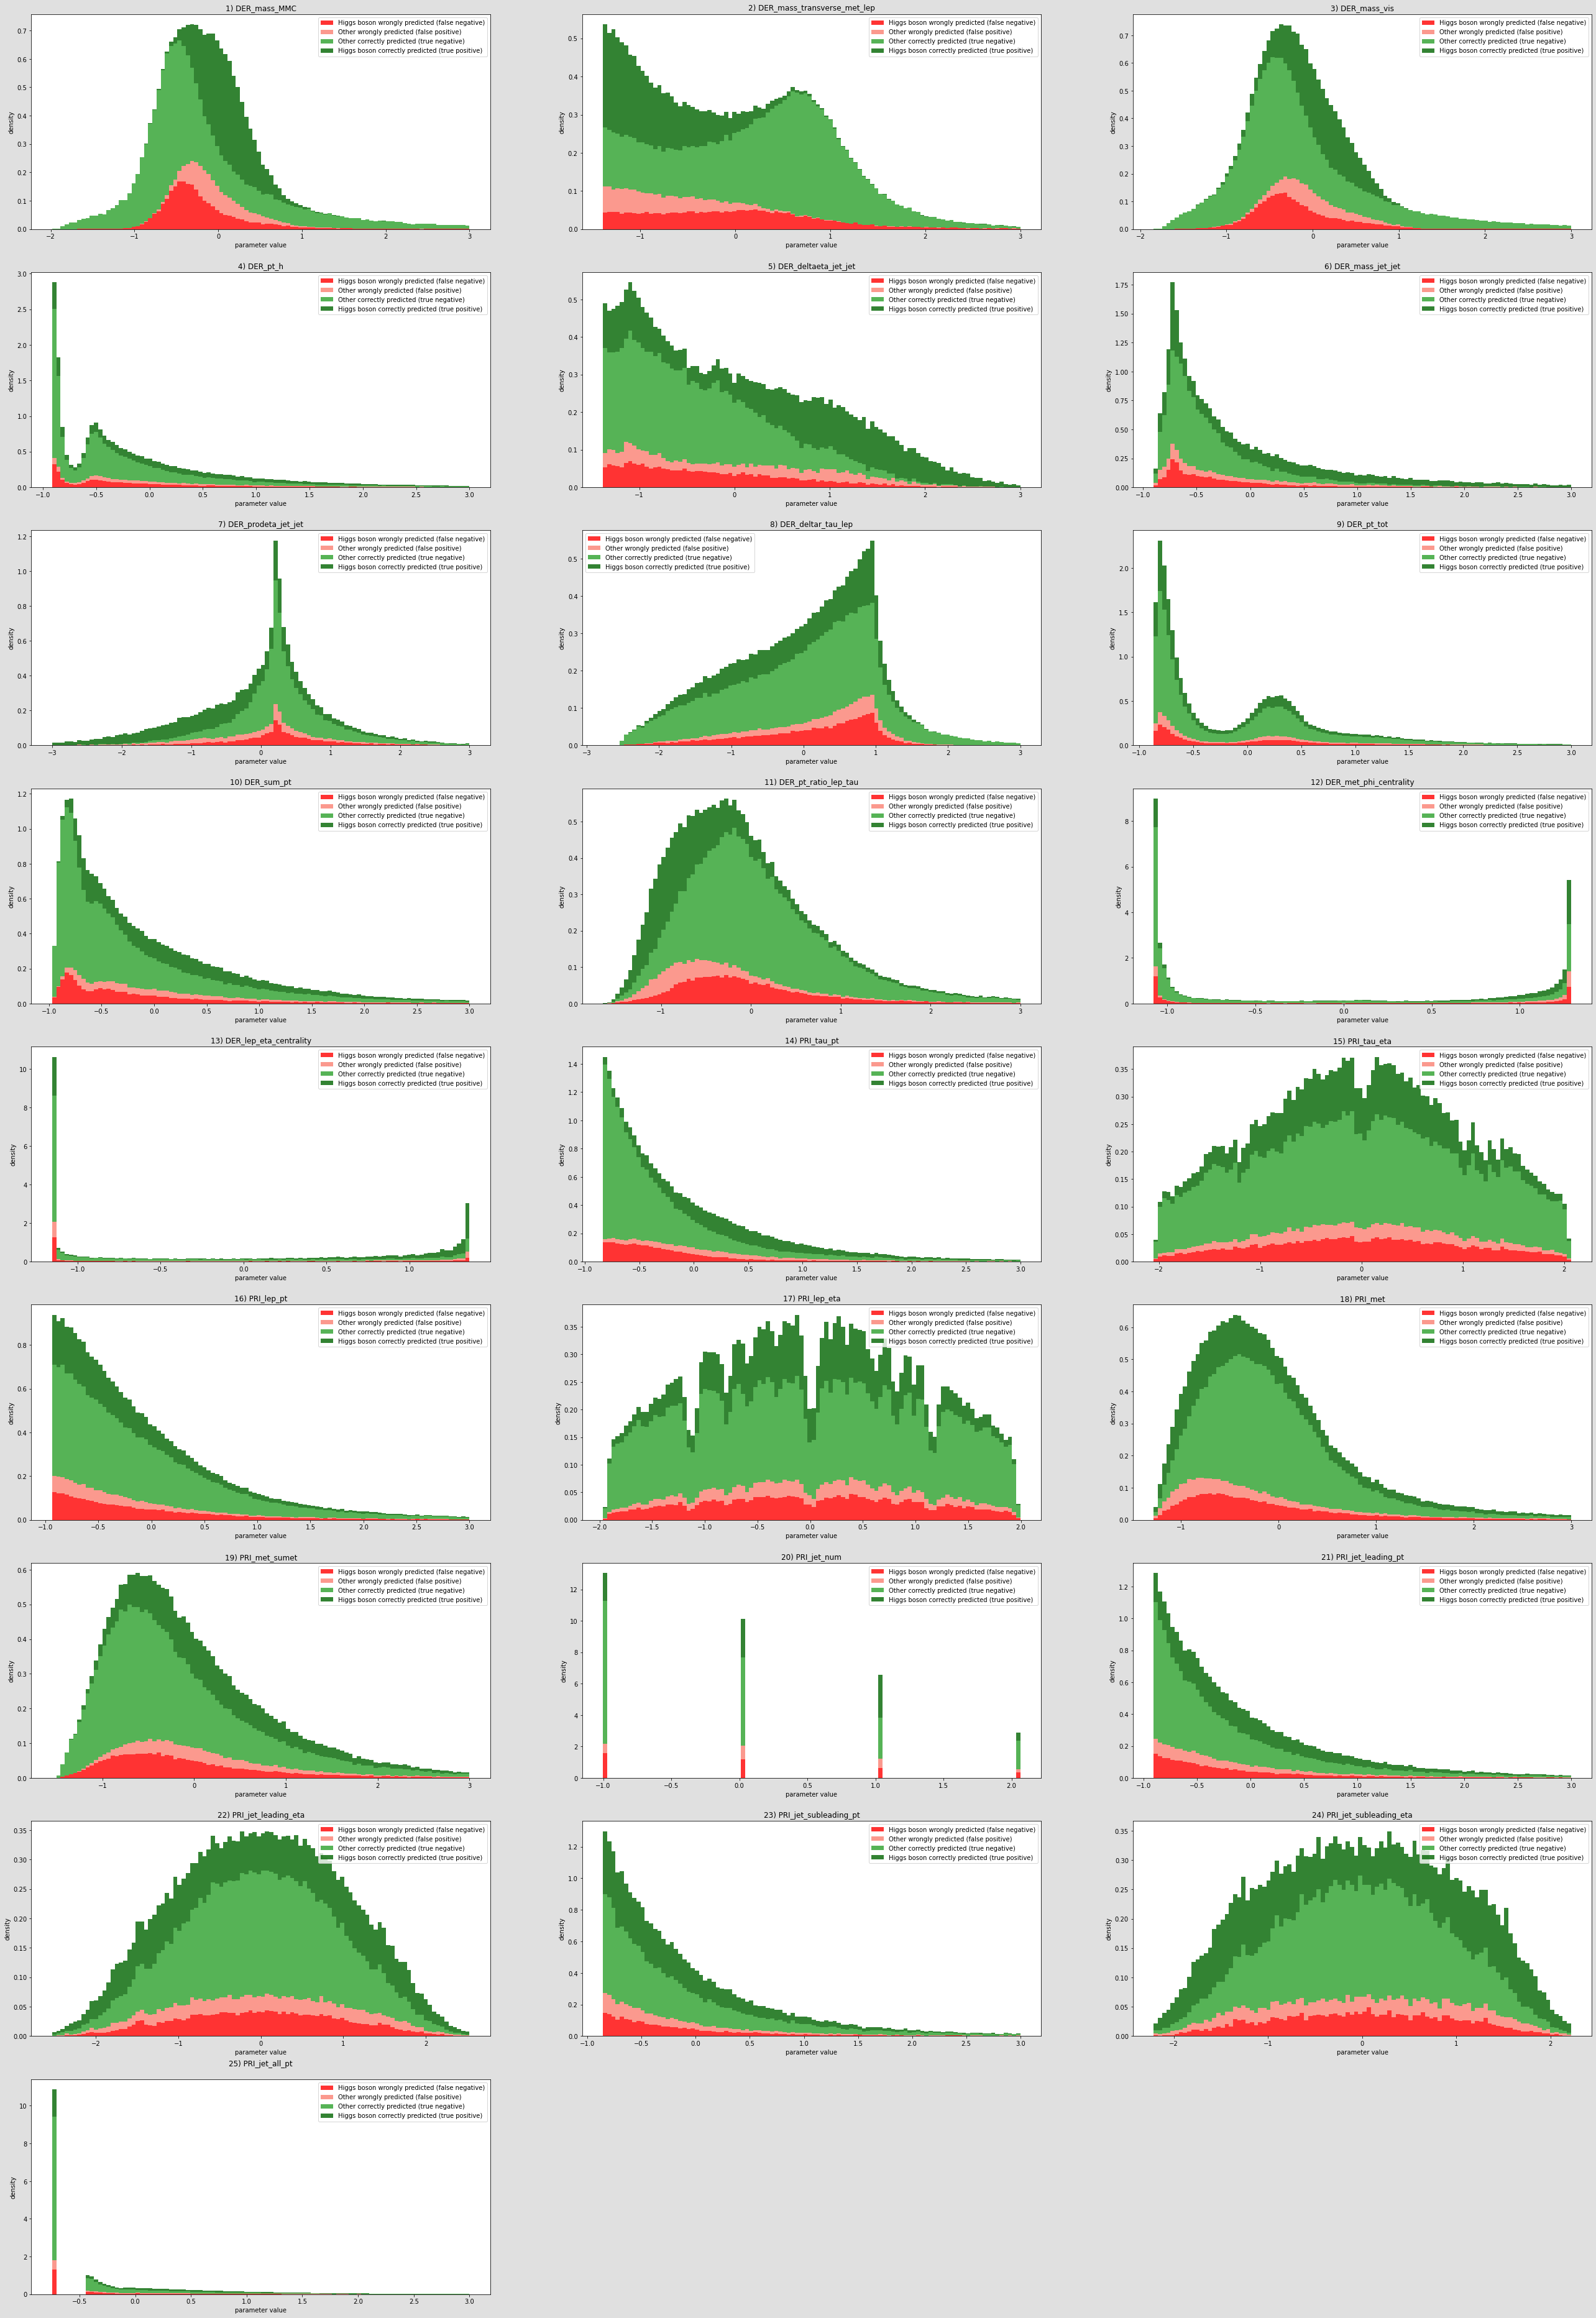

0

In [7]:
y_dv2, tX_dv2, _, _, _ = preprocess_data(y_train, tX_train, ids_train, tX_test, ids_test, param={'Degree_poly': 9})
w_dv, _ = ridge_regression(y_dv2, tX_dv2, 0.0001)
y_pred_dv = predict_labels(w_dv.reshape(-1,1), tX_dv2)

print("Features visualization (preprocessed dataset with predictions)")
plot_features_visualization(y_dv1, tX_dv1[:,1:], y_pred_dv, names=param_names_dv, save=plot_save)

# Generate predictions and save ouput in csv format for submission:

Ridge trial submission

Model creation and test_data preprocessing

In [13]:
y_tr, tX_tr, ids_tr, tX_te, ids_te = preprocess_data(y_train, tX_train, ids_train, tX_test, ids_test, param={'Build_poly': True, 'Degree_poly' : 10})
best_lambda = 1e-6
weights, loss = ridge_regression(y_tr, tX_tr, best_lambda)

In [15]:
OUTPUT_PATH = 'Results/ridge_poly10_1e-6.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_te)
create_csv_submission(ids_te, y_pred, OUTPUT_PATH)